# 소셜 네트워크 분석

## 1. 비즈니스 이해

### Background: 어떠한 문제가 존재하는지 상황에 대해 알려진 기사, 논문, 보고서 등을 인용하여 현상을 구체적으로 기술하시기 바랍니다.
- [[열려라 공부] 새 친구 '탐색 시기' 학교폭력도 늘어요](http://news.joins.com/article/21292322)
- ["학생 네트워크 중요해"](http://news.joins.com/article/21292322)
- 새 학년이 시작되는 3월엔 새로 만난 학생 사이의 갈등도 생기기 마련이다. 송형호 서울 천호중 교사(전 서울시교육청학교폭력담당 파견교사)는 이를 두고 ‘3주의 징크스’라고 불렀다. 개학 직후 1~2주를 지나 3주차가 되면 크고 작은 학교폭력이 시작된다는 설명이다.

### Business Objectives: 기업(혹은 본인)에게 이 현상이 어떠한 이유로 분석을 해야 하는지 추상적(함축적)으로 기술하시기 바랍니다.
- 교우관계 진단을 통해 “따돌림 위기군”을 사전에 파악하고, 학교 내 청소년 교우관계 문제를 해소하는데 도움이 되고자 함.

### Business Success Criteria: 비즈니스 관점에서 분석결과의 성공기준(정량적) 또는 유용한 결과에 대한 기준(정성적)을 설명하십시오.
- 교사 입장에서 교우관계 진단을 통해, 집중적으로 관리해야할 학생군을 파악하고, 학기 초와 비교하여 학기 말에 1명(왕따) 혹은 2명의 학생 네트워크 수를 줄인다.

### Analysis Goals: 비즈니스 목표에 대한 의사결정 지원을 위해 실시하는 분석의 목표를 기술합니다. 
- 학생 네트워크 수의 변화 양상 분석, 소수 학생(1명 혹은 2명간) 네트워크 파악
- ![외톨이 유형](외톨이.jpg)
- 참조문헌(http://cyram.tistory.com/213)

## 2. 데이터의 이해
- 학기초 학생에 대한 설문조사를 실시하여 데이터를 수집함.
- [구글 설문조사 활용](https://goo.gl/forms/QSPhpQmOpWwxT1gS2)
    - 구글 설문: 학기 초 1회 실시(47명)
    - 구글 설문: 학기 중간 1회 실시(47명)
- 데이터 전처리 : 2개 entity를 결합 / 집계


## 3. 데이터 준비

In [2]:
# 네트워크 분석을 지원하는 networkx, pydot 모듈을 설치해야 함.
# conda install -c anaconda networkx
# pip install pydot
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
# import pydot
%matplotlib inline

# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

#### 네트워크 그래프 클래스
- Graph: 이 클래스는 무방향 그래프를 구현합니다. 두 노드 사이의 여러 엣지를 무시합니다. 노드와 노드 사이에 자체 루프 에지를 허용합니다.
- DiGraph: 방향성 그래프, 즉 방향성 엣지를 가진 그래프. 유향 그래프(Graph의 서브 클래스)에 공통의 조작을 제공합니다.
- MultiGraph: 노드 쌍 사이에 여러 무방향 에지를 허용하는 유연한 그래프 클래스입니다. 추가 유연성은 일반적으로 중요하지 않지만 성능 저하를 가져옵니다.
- MultiDiGraph: MultiGraph의 방향성 버전.

In [3]:
# 그래프 유형 선언
G1 = nx.Graph()
G2 = nx.DiGraph()
G3 = nx.MultiGraph()
G4 = nx.MultiDiGraph()

In [4]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'D')
G.add_edge('A', 'C')
G.add_edge('C', 'D')
nx.shortest_path(G, 'A', 'D', weight='weight')

['A', 'B', 'D']

### 데이터 임포트
- 데이터 내 값: NaN은 하나의 열 단위로 존재하는데, 이는 해당 열의 인원이 출석하지 않음을 의미함. -> 제거
- 데이터 내 값: - 은 본인이 본인을 평가할 수 없기 때문에 입력된 것
- 데이터 내 값: 1 은 관계가 있음을 의미
- 데이터 내 값: 0 은 관계가 없음을 의미

In [6]:
# 구글 설문 데이터를 불러옴.
data = pd.read_excel("studentnetwork_download.xlsx")
data.head()

,1. 경영학부 09학번 김진용,2. 경영학부 11학번 임철현,3. 경영학부 12학번 강예지,4. 경영학부 12학번 배성원,5. 경영학부 12학번 윤태성,6. 경영학부 12학번 최용환,7. 경영학부 12학번 김대엽,8. 경영학부 12학번 이호선,9. 경영학부 13학번 고성규,10. 경영학부 13학번 권오승,...,38. 경영학부 17학번 김엘레나,39. 경제학부 13학번 이충현,40. 경제학부 16학번 이예은,41. 산업경영공학과 14학번 이주영,42. 영미언어문화학과 12학번 강승훈,43. 영미언어문화학과 12학번 허동숙,44. 영미언어문화학과 14학번 추화정,45. 신문방송학과 13학번 장선호,46. 신문방송학과 14학번 김서현,47. 정보사회학과 13학번 박상준
강승훈,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
황은택,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
허동숙,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
배성원,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
이종석,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 설문에 참여를 참여를 안 한 열을 제거함.
# 생략
data = data.dropna(axis=1) # axis =1 열을 기준으로 삭제
data.head()

In [7]:
# 우리는 adjacency matrix나 edgelist가 필요함.
# 컬럼명을 변경해야함. ex) 1. 경영학부 10학번 이정우 -> 이정우
data.columns # 우선 컬럼명 조회

Index(['1. 경영학부 09학번 김진용', '2. 경영학부 11학번 임철현', '3. 경영학부 12학번 강예지',
       '4. 경영학부 12학번 배성원', '5. 경영학부 12학번 윤태성', '6. 경영학부 12학번 최용환',
       '7. 경영학부 12학번 김대엽', '8. 경영학부 12학번 이호선', '9. 경영학부 13학번 고성규',
       '10. 경영학부 13학번 권오승', '11. 경영학부 13학번 민경민', '12. 경영학부 13학번 지수창',
       '13. 경영학부 13학번 이찬희', '14. 경영학부 14학번 강슬기', '15. 경영학부 14학번 강연주',
       '16. 경영학부 14학번 권혜민', '17. 경영학부 14학번 김재경', '18. 경영학부 14학번 우지원',
       '19. 경영학부 14학번 유상연', '20. 경영학부 14학번 이종석', '21. 경영학부 14학번 전규리',
       '22. 경영학부 14학번 조영욱', '23. 경영학부 14학번 황은택', '24. 경영학부 14학번 최유라',
       '25. 경영학부 15학번 고민주', '26. 경영학부 15학번 정혜욱', '27. 경영학부 15학번 하수정',
       '28. 경영학부 15학번 한명우', '29. 경영학부 15학번 나미영', '30. 경영학부 15학번 봉인성',
       '31. 경영학부 15학번 이혜지', '32. 경영학부 15학번 채영석', '33. 경영학부 16학번 박민진',
       '34. 경영학부 16학번 안예지', '35. 경영학부 17학번 박지성', '36. 경영학부 17학번 정재훈',
       '37. 경영학부 17학번 한효경', '38. 경영학부 17학번 김엘레나', '39. 경제학부 13학번 이충현',
       '40. 경제학부 16학번 이예은', '41. 산업경영공학과 14학번 이주영', '42. 영미언어문화학과 12학번 강승훈',
       '43. 영미언어문화학과 

In [8]:
data.columns[0].split()

['1.', '경영학부', '09학번', '김진용']

In [9]:
# 컬럼명 정리
column_list = []
for i in data.columns:
    column_list.append(i.split()[-1]) # 공백으로 나눠서 나오는 리스트의 맨 마지막 문자열[-1]이 바로 학생이름임.
column_list[:5]

['김진용', '임철현', '강예지', '배성원', '윤태성']

In [10]:
data.columns = column_list
data.head()

,김진용,임철현,강예지,배성원,윤태성,최용환,김대엽,이호선,고성규,권오승,...,김엘레나,이충현,이예은,이주영,강승훈,허동숙,추화정,장선호,김서현,박상준
강승훈,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
황은택,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
허동숙,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
배성원,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
이종석,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# 엣지리스트 만들기
edgelist = []
for i in data.index:
    for j in data.columns:
        if data.loc[i,j] == 1:
            edgelist.append((i,j))
        else:
            pass
edgelist

[('강승훈', '황은택'),
 ('강승훈', '허동숙'),
 ('황은택', '지수창'),
 ('황은택', '유상연'),
 ('황은택', '강승훈'),
 ('황은택', '허동숙'),
 ('허동숙', '황은택'),
 ('허동숙', '강승훈'),
 ('배성원', '윤태성'),
 ('배성원', '최용환'),
 ('배성원', '이호선'),
 ('이종석', '권오승'),
 ('이종석', '강연주'),
 ('고민주', '한명우'),
 ('고민주', '봉인성'),
 ('고민주', '채영석'),
 ('최용환', '배성원'),
 ('최용환', '윤태성'),
 ('최용환', '김대엽'),
 ('최용환', '황은택'),
 ('김재경', '강슬기'),
 ('김재경', '우지원'),
 ('김재경', '전규리'),
 ('한효경', '권오승'),
 ('한효경', '이종석'),
 ('나미영', '김진용'),
 ('나미영', '최유라'),
 ('나미영', '봉인성'),
 ('나미영', '이혜지'),
 ('나미영', '김엘레나'),
 ('나미영', '이충현'),
 ('윤태성', '배성원'),
 ('윤태성', '최용환'),
 ('지수창', '임철현'),
 ('지수창', '민경민'),
 ('지수창', '이찬희'),
 ('지수창', '강연주'),
 ('지수창', '김재경'),
 ('지수창', '유상연'),
 ('지수창', '이종석'),
 ('지수창', '황은택'),
 ('지수창', '한효경'),
 ('정재훈', '박지성'),
 ('정재훈', '장선호'),
 ('정재훈', '박상준'),
 ('권오승', '임철현'),
 ('권오승', '김대엽'),
 ('권오승', '고성규'),
 ('권오승', '이종석'),
 ('권오승', '한효경'),
 ('김진용', '나미영'),
 ('김진용', '김엘레나'),
 ('김진용', '이충현'),
 ('최유라', '한명우'),
 ('최유라', '나미영'),
 ('최유라', '봉인성'),
 ('최유라', '이혜지'),
 ('최유라', '채영석'),
 ('최유라', '김서

In [12]:
len(edgelist) # 관계의 수를 확인

191

In [14]:
# 방향성 그래프를 만들고, 우리가 만든 관계 리스트(edgelist)를 입력시킨다.
G = nx.DiGraph()
G.add_edges_from(edgelist)

In [15]:
# node 확인
G.node

NodeView(('강승훈', '황은택', '허동숙', '지수창', '유상연', '배성원', '윤태성', '최용환', '이호선', '이종석', '권오승', '강연주', '고민주', '한명우', '봉인성', '채영석', '김대엽', '김재경', '강슬기', '우지원', '전규리', '한효경', '나미영', '김진용', '최유라', '이혜지', '김엘레나', '이충현', '임철현', '민경민', '이찬희', '정재훈', '박지성', '장선호', '박상준', '고성규', '김서현', '이주영', '추화정', '이예은', '권혜민', '정혜욱', '박민진', '하수정', '안예지', '강예지', '조영욱'))

In [16]:
# edge 확인
G.edges

OutEdgeView([('강승훈', '황은택'), ('강승훈', '허동숙'), ('황은택', '지수창'), ('황은택', '유상연'), ('황은택', '강승훈'), ('황은택', '허동숙'), ('허동숙', '황은택'), ('허동숙', '강승훈'), ('지수창', '임철현'), ('지수창', '민경민'), ('지수창', '이찬희'), ('지수창', '강연주'), ('지수창', '김재경'), ('지수창', '유상연'), ('지수창', '이종석'), ('지수창', '황은택'), ('지수창', '한효경'), ('유상연', '임철현'), ('유상연', '강예지'), ('유상연', '최용환'), ('유상연', '이찬희'), ('유상연', '강연주'), ('유상연', '권혜민'), ('유상연', '황은택'), ('유상연', '한명우'), ('유상연', '이예은'), ('배성원', '윤태성'), ('배성원', '최용환'), ('배성원', '이호선'), ('윤태성', '배성원'), ('윤태성', '최용환'), ('최용환', '배성원'), ('최용환', '윤태성'), ('최용환', '김대엽'), ('최용환', '황은택'), ('이종석', '권오승'), ('이종석', '강연주'), ('권오승', '임철현'), ('권오승', '김대엽'), ('권오승', '고성규'), ('권오승', '이종석'), ('권오승', '한효경'), ('강연주', '임철현'), ('강연주', '김대엽'), ('강연주', '지수창'), ('강연주', '강슬기'), ('강연주', '권혜민'), ('강연주', '우지원'), ('강연주', '유상연'), ('강연주', '이종석'), ('강연주', '전규리'), ('강연주', '황은택'), ('강연주', '정혜욱'), ('강연주', '이예은'), ('고민주', '한명우'), ('고민주', '봉인성'), ('고민주', '채영석'), ('채영석', '최유라'), ('채영석', '고민주'), ('채영석', '봉인성'), ('채영석', '이혜지'), ('김대엽', '임철

### 그래프 그려보기
![색깔조합](named_colors.png)
- [색상참조](https://matplotlib.org/2.0.2/examples/color/named_colors.html)
- [파라미터 참조](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)

- nx.draw(G) : 기본 그리기
- nx.draw_circular(G) : 원 위에 노드 놓기
- nx.draw_graphviz(G) : Graphviz 사용
- nx.draw_kamada_kawai(G) : kamada_kawai 알고리즘
- nx.draw_random(G) : 균등 분포를 이용한 랜덤
- nx.draw_shell(G) : 동심원 위에 노드 놓기
- nx.draw_spectral(G) : 그래프 라플라시안의 고유 벡터 기반
- nx.draw_spring(G) : Fruchterman-Reingold force-directed alg. 기반

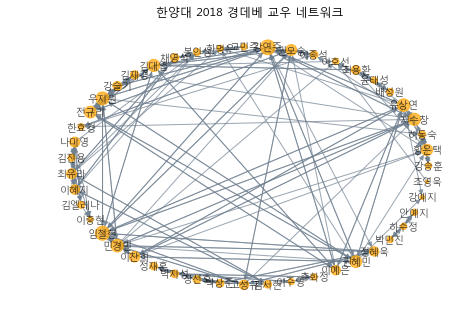

In [17]:
nx.draw_shell(G, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     node_color = "orange", # 노드 색상
                     edge_color = "slategray", # 엣지 색상
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True,# 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('한양대 2018 경데베 교우 네트워크') # 그래프 제목
plt.savefig('first_network.png') # 파일 저장

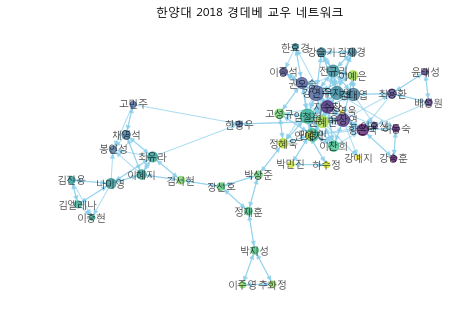

In [18]:
nx.draw_kamada_kawai(G, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     # node_color = "cadetblue", # 노드 색상
                     node_color = range(len(G.nodes)),
                     edge_color = "skyblue", # 엣지 색상
                     # edge_color=colors,
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True, # 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('한양대 2018 경데베 교우 네트워크') # 그래프 제목
plt.savefig('second_network.png') # 파일 저장

## 4. 데이터 분석

### 연결 정도(양적인 영향력)

In [19]:
nx.degree(G)

DiDegreeView({'강승훈': 4, '황은택': 13, '허동숙': 5, '지수창': 15, '유상연': 16, '배성원': 5, '윤태성': 4, '최용환': 8, '이호선': 4, '이종석': 6, '권오승': 12, '강연주': 22, '고민주': 4, '한명우': 4, '봉인성': 5, '채영석': 7, '김대엽': 15, '김재경': 7, '강슬기': 8, '우지원': 17, '전규리': 14, '한효경': 4, '나미영': 10, '김진용': 5, '최유라': 10, '이혜지': 9, '김엘레나': 5, '이충현': 3, '임철현': 20, '민경민': 16, '이찬희': 11, '정재훈': 6, '박지성': 6, '장선호': 6, '박상준': 6, '고성규': 9, '김서현': 6, '이주영': 4, '추화정': 4, '이예은': 9, '권혜민': 14, '정혜욱': 9, '박민진': 4, '하수정': 4, '안예지': 4, '강예지': 2, '조영욱': 1})

In [20]:
pd.DataFrame(list(nx.degree(G))).sort_values(by=1, ascending = False).head(10)

,0,1
11,강연주,22
28,임철현,20
19,우지원,17
4,유상연,16
29,민경민,16
16,김대엽,15
3,지수창,15
40,권혜민,14
20,전규리,14
1,황은택,13


### 연결중심성
- 연결 정도를 비율로 계산(상대적 비교)

In [26]:
nx.in_degree_centrality(G)

{'강슬기': 0.08695652173913043,
 '강승훈': 0.043478260869565216,
 '강연주': 0.21739130434782608,
 '강예지': 0.043478260869565216,
 '고민주': 0.021739130434782608,
 '고성규': 0.08695652173913043,
 '권오승': 0.15217391304347827,
 '권혜민': 0.13043478260869565,
 '김대엽': 0.15217391304347827,
 '김서현': 0.06521739130434782,
 '김엘레나': 0.043478260869565216,
 '김재경': 0.08695652173913043,
 '김진용': 0.043478260869565216,
 '나미영': 0.08695652173913043,
 '민경민': 0.13043478260869565,
 '박민진': 0.043478260869565216,
 '박상준': 0.06521739130434782,
 '박지성': 0.06521739130434782,
 '배성원': 0.043478260869565216,
 '봉인성': 0.10869565217391304,
 '안예지': 0.043478260869565216,
 '우지원': 0.17391304347826086,
 '유상연': 0.15217391304347827,
 '윤태성': 0.043478260869565216,
 '이예은': 0.08695652173913043,
 '이종석': 0.08695652173913043,
 '이주영': 0.043478260869565216,
 '이찬희': 0.10869565217391304,
 '이충현': 0.06521739130434782,
 '이혜지': 0.08695652173913043,
 '이호선': 0.08695652173913043,
 '임철현': 0.21739130434782608,
 '장선호': 0.06521739130434782,
 '전규리': 0.15217391304347827,
 '정

In [22]:
nx.closeness_centrality(G)

{'강슬기': 0.1932523997741389,
 '강승훈': 0.19077480490523968,
 '강연주': 0.2419582891481089,
 '강예지': 0.19742958709324585,
 '고민주': 0.11856920145504937,
 '고성규': 0.2380869565217391,
 '권오승': 0.2254611330698287,
 '권혜민': 0.2254611330698287,
 '김대엽': 0.234337555631633,
 '김서현': 0.18955967875934646,
 '김엘레나': 0.12000350631136046,
 '김재경': 0.19579519450800917,
 '김진용': 0.12000350631136046,
 '나미영': 0.13972239232496428,
 '민경민': 0.2500913408841798,
 '박민진': 0.043478260869565216,
 '박상준': 0.2500913408841798,
 '박지성': 0.1730283114256825,
 '배성원': 0.16262770254217154,
 '봉인성': 0.14737701571749337,
 '안예지': 0.043478260869565216,
 '우지원': 0.23070441523424337,
 '유상연': 0.23619737750172534,
 '윤태성': 0.16262770254217154,
 '이예은': 0.20245489500147887,
 '이종석': 0.20108695652173914,
 '이주영': 0.14377231674018062,
 '이찬희': 0.22045088566827697,
 '이충현': 0.12606949537279555,
 '이혜지': 0.16352126134734832,
 '이호선': 0.2361801242236025,
 '임철현': 0.2730355005983247,
 '장선호': 0.22045088566827697,
 '전규리': 0.2038415723645027,
 '정재훈': 0.21257763975155

In [23]:
nx.betweenness_centrality(G)

{'강슬기': 0.0025866672243483836,
 '강승훈': 0.0,
 '강연주': 0.12969828078523732,
 '강예지': 0.0,
 '고민주': 0.00024154589371980676,
 '고성규': 0.018995684937713933,
 '권오승': 0.029093279238206787,
 '권혜민': 0.01768330300938997,
 '김대엽': 0.08001509092088799,
 '김서현': 0.24122383252818033,
 '김엘레나': 0.0,
 '김재경': 0.0017945326278659612,
 '김진용': 0.0,
 '나미영': 0.08840579710144927,
 '민경민': 0.08993840432246232,
 '박민진': 0.0,
 '박상준': 0.3371980676328502,
 '박지성': 0.07246376811594203,
 '배성원': 0.0007936507936507937,
 '봉인성': 0.0,
 '안예지': 0.0,
 '우지원': 0.04332299745343226,
 '유상연': 0.06751972128783722,
 '윤태성': 0.0,
 '이예은': 0.0029979735776837226,
 '이종석': 0.008252405136463107,
 '이주영': 0.0,
 '이찬희': 0.002436713849757328,
 '이충현': 0.0,
 '이혜지': 0.09565217391304348,
 '이호선': 0.0,
 '임철현': 0.15843319723754506,
 '장선호': 0.2619967793880837,
 '전규리': 0.011781890948557612,
 '정재훈': 0.10579710144927536,
 '정혜욱': 0.34792751531881966,
 '조영욱': 0.0,
 '지수창': 0.0536775275181072,
 '채영석': 0.036231884057971016,
 '최용환': 0.07248907292385552,
 '최유라': 0.1008856

![삼각관계](triads.jpg)

- 1-003
- 3-102
- 4-021D
- 6-021C

In [24]:
nx.triadic_census(G)

{'003': 11657,
 '012': 1264,
 '021C': 9,
 '021D': 20,
 '021U': 22,
 '030C': 0,
 '030T': 2,
 '102': 2849,
 '111D': 42,
 '111U': 111,
 '120C': 1,
 '120D': 0,
 '120U': 14,
 '201': 159,
 '210': 20,
 '300': 45}

## 5. 분석 결과

In [27]:
print("Number of Nodes : ", nx.number_of_nodes(G))
print("Number of Edges : ", nx.number_of_edges(G))
degreelist = list(pd.DataFrame(list(nx.degree(G))).iloc[:,1])
print("Avg. Node Degree : ", float(sum(degreelist))/nx.number_of_nodes(G))
print("Avg. Path Length : ", nx.average_shortest_path_length(G))

Number of Nodes :  47
Number of Edges :  191
Avg. Node Degree :  8.127659574468085


NetworkXError: Graph is not weakly connected.

In [28]:
G.nodes

NodeView(('강승훈', '황은택', '허동숙', '지수창', '유상연', '배성원', '윤태성', '최용환', '이호선', '이종석', '권오승', '강연주', '고민주', '한명우', '봉인성', '채영석', '김대엽', '김재경', '강슬기', '우지원', '전규리', '한효경', '나미영', '김진용', '최유라', '이혜지', '김엘레나', '이충현', '임철현', '민경민', '이찬희', '정재훈', '박지성', '장선호', '박상준', '고성규', '김서현', '이주영', '추화정', '이예은', '권혜민', '정혜욱', '박민진', '하수정', '안예지', '강예지', '조영욱'))

In [34]:
eG = nx.ego_graph(G, "박지성", radius=1, center=True, undirected=False, distance=None)

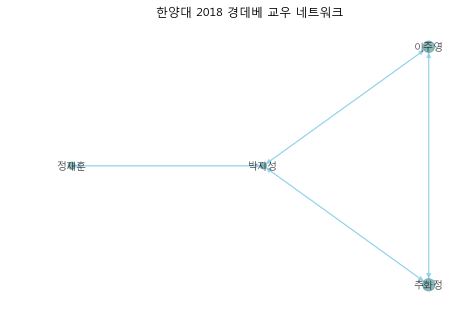

In [36]:
nx.draw_kamada_kawai(eG, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     node_color = "cadetblue", # 노드 색상
                     edge_color = "skyblue", # 엣지 색상
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True, # 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('한양대 2018 경데베 교우 네트워크') # 그래프 제목
plt.savefig('third_network.png') # 파일 저장

## 6. 시사점